In [4]:
from test_MDbrew.opener import DumpOpener
from test_MDbrew.extractor import Extractor
from test_MDbrew.msd import MSD

path = './test.lammpstrj'
data = DumpOpener(path)
extractor = Extractor(data=data)
unwrapped_position = extractor.extract_position(type_=2, wrapped=False)

 STEP (Done) :  get_database		->  1.51 s ✅ 
 STEP (Done) :  get_columns		->  0.00 s ✅ 
 STEP (Done) :  get_system_size		->  0.00 s ✅ 
 STEP (Done) :  extract_position	->  0.84 s ✅ 


 MSD  (STEP) : 100%|#############| 401/401 [00:00<00:00, 67446.60it/s]


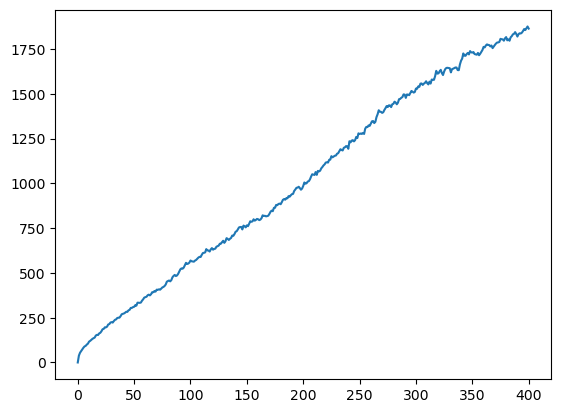

 MSD  (STEP) : 100%|###############| 400/400 [00:00<00:00, 510.55it/s]


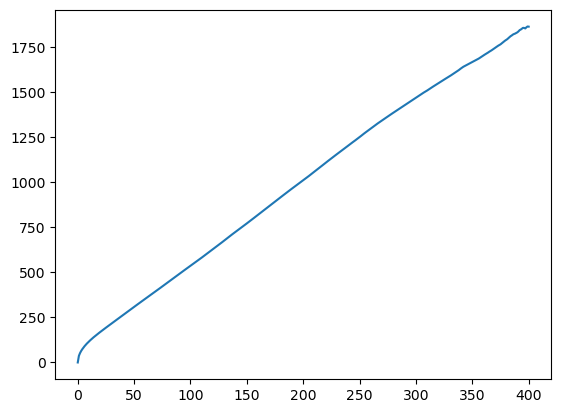

 MSD  (STEP) : 100%|############| 401/401 [00:00<00:00, 135496.33it/s]


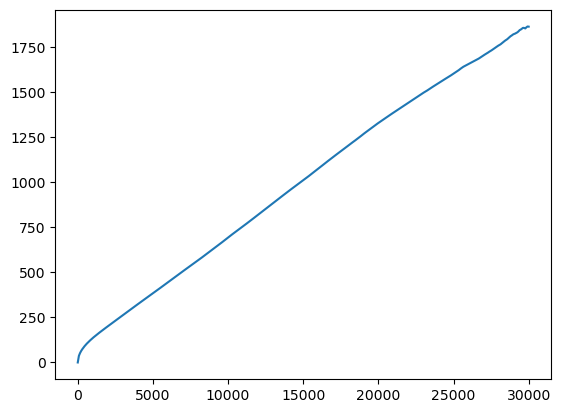

In [6]:
msd = MSD(unwrapped_position)
msd.get_msd(method="direct", fft=True)
msd.plot_msd()
msd.get_msd(method="window", fft=False)
msd.plot_msd()
msd.get_msd(method="window", fft=True)
msd.plot_msd(time_step=15000*0.005)

In [3]:
import pandas as pd
import numpy as np
data1 = pd.DataFrame(data=[[1,1,1], [2,3,1], [1,2,1]]) * np.array([2,2,2])
data2 = pd.DataFrame(data=[2,2,2])

In [4]:
data